In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/crime2.csv", index_col = ["mun_name", "date"], parse_dates = True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2114 entries, (MONTERREY, 2015-10-12 00:00:00) to (SALINAS VICTORIA, 2011-01-14 00:00:00)
Data columns (total 8 columns):
year            2114 non-null int64
lat             2114 non-null float64
lon             2114 non-null float64
news            2114 non-null object
cassualties     2114 non-null float64
url             2114 non-null object
neighborhood    1907 non-null object
area            1907 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 147.7+ KB


In [4]:
df = df[["cassualties"]]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2114 entries, (MONTERREY, 2015-10-12 00:00:00) to (SALINAS VICTORIA, 2011-01-14 00:00:00)
Data columns (total 1 columns):
cassualties    2114 non-null float64
dtypes: float64(1)
memory usage: 32.1+ KB


In [6]:
df.head()

cassualties
mun_name       date                   
MONTERREY      2015-10-12          1.0
               2015-10-02          1.0
SANTA CATARINA 2015-10-01          1.0
MONTERREY      2015-09-24          1.0
               2015-09-24          2.0

#### Primero por semestre

In [7]:
level_values = df.index.get_level_values
df_agg = df.groupby([level_values(0)] + [pd.Grouper(freq='2Q', closed='left', level=-1)]).sum()

In [8]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 189 entries, (APODACA, 2011-06-30 00:00:00) to (SANTIAGO, 2017-12-31 00:00:00)
Data columns (total 1 columns):
cassualties    189 non-null float64
dtypes: float64(1)
memory usage: 2.2+ KB


In [9]:
df_mun = df_agg.unstack(level = 1)

In [10]:
df_mun.head()

cassualties                                              \
date               2011-06-30 2011-12-31 2012-06-30 2012-12-31 2013-06-30   
mun_name                                                                    
APODACA                  40.0       32.0       49.0       30.0       30.0   
CADEREYTA JIMÉNEZ        36.0       21.0       46.0        8.0        4.0   
CARMEN                    1.0        4.0        1.0        3.0        1.0   
CIÉNEGA DE FLORES         2.0        6.0        NaN        1.0        NaN   
GARCÍA                    6.0        8.0        2.0        6.0        4.0   

                                                                          \
date              2013-12-31 2014-06-30 2014-12-31 2015-06-30 2015-12-31   
mun_name                                                                   
APODACA                 21.0       11.0        6.0        6.0        3.0   
CADEREYTA JIMÉNEZ        6.0        6.0        4.0       11.0        3.0   
CARMEN                   NaN        1.0        NaN        NaN        NaN   
CIÉNEGA DE FLORES        NaN        2.0        NaN        NaN        NaN   
GARCÍA                   2.0        3.0        3.0        2.0        4.0   

                                                                          
date              2016-06-30 2016-12-31 2017-06-30 2017-12-31 2018-06-30  
mun_name                                                                  
APODACA                 12.0        NaN        6.0        7.0        4.0  
CADEREYTA JIMÉNEZ        1.0        1.0        6.0        4.0        1.0  
CARMEN                   NaN        NaN        NaN        NaN        NaN  
CIÉNEGA DE FLORES        1.0        NaN        1.0        NaN        NaN  
GARCÍA                   2.0        NaN        NaN        2.0        NaN

In [11]:
df_mun = df_mun.fillna(0)

In [12]:
corr_mun = df_mun.T.corr(method="pearson")

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

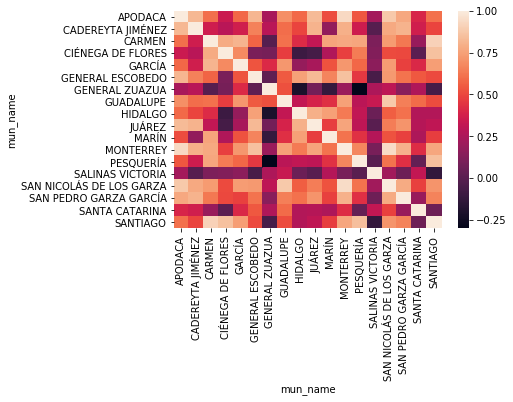

In [14]:
heat_map = sns.heatmap(corr_mun)
plt.show()

### Pero eso no era lo que queríamos ja

### Primero vamos a hacer agregado por semanas y slice por semestres

In [15]:
semesters = pd.date_range("2010-12-31", max(level_values(1)), freq='6M')

In [16]:
df_agg = df.groupby([level_values(0)] + [pd.Grouper(freq='2W', closed='left', level=-1)]).sum()

In [18]:
df_agg.sort_index(level=['mun_name','date'], inplace=True, ascending=[True, True])

In [19]:
idx = pd.IndexSlice

In [20]:
df_filter = df_agg.loc[idx[:, :semesters[1]], :]

In [21]:
df_mun = df_filter.unstack(level = 1)

In [22]:
df_mun.head()

cassualties                                              \
date               2011-01-09 2011-01-23 2011-02-06 2011-02-20 2011-03-20   
mun_name                                                                    
APODACA                   5.0        1.0       10.0        1.0        1.0   
CADEREYTA JIMÉNEZ         4.0        2.0        1.0        1.0        NaN   
CARMEN                    NaN        1.0        NaN        NaN        NaN   
CIÉNEGA DE FLORES         NaN        NaN        NaN        NaN        NaN   
GARCÍA                    NaN        1.0        1.0        NaN        NaN   

                                                                          \
date              2011-04-03 2011-05-01 2011-05-15 2011-05-29 2011-06-12   
mun_name                                                                   
APODACA                  5.0        1.0        6.0        1.0        4.0   
CADEREYTA JIMÉNEZ        2.0        NaN        2.0        7.0        1.0   
CARMEN                   NaN        NaN        NaN        NaN        NaN   
CIÉNEGA DE FLORES        1.0        NaN        NaN        1.0        NaN   
GARCÍA                   NaN        NaN        1.0        NaN        NaN   

                                                    
date              2011-06-26 2011-03-06 2011-04-17  
mun_name                                            
APODACA                  5.0        NaN        NaN  
CADEREYTA JIMÉNEZ        NaN        4.0       10.0  
CARMEN                   NaN        NaN        NaN  
CIÉNEGA DE FLORES        NaN        NaN        NaN  
GARCÍA                   NaN        3.0        NaN

In [23]:
df_mun = df_mun.fillna(0)

In [24]:
corr_mun = df_mun.T.corr(method="pearson")

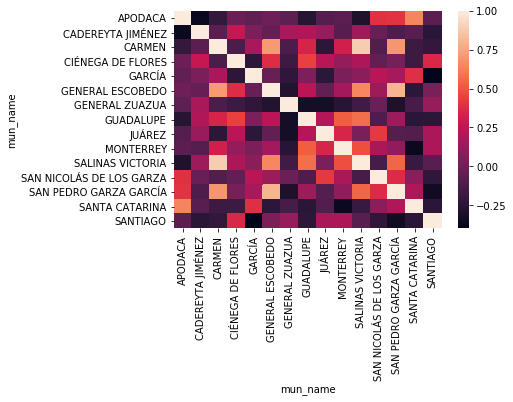

In [25]:
heat_map = sns.heatmap(corr_mun)
plt.show()

In [26]:
corr_mun_pos = corr_mun[corr_mun > 0][ corr_mun < 1]

In [27]:
corr_mun_pos = corr_mun_pos.stack().rename("correlation").rename_axis(
    ["source", "target"]).reset_index(level=['source', 'target'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f27483a6d30>]],
      dtype=object)

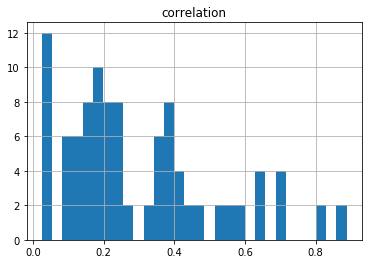

In [28]:
corr_mun_pos.hist(bins=30)

In [29]:
import networkx as nx

In [30]:
G = nx.from_pandas_edgelist(corr_mun_pos,  edge_attr="correlation")

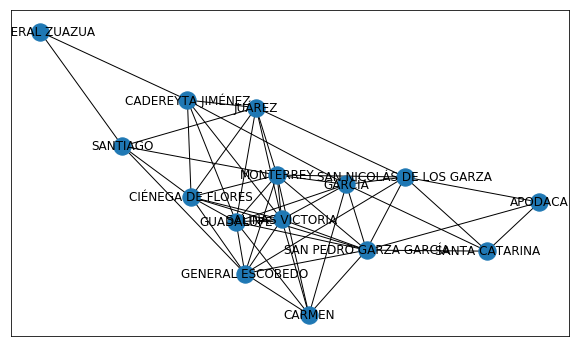

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6));
nx.draw_networkx(G, ax=ax)

### Ahora, el filter y las correlaciones tenemos que hacerlas por cada slice de tiempo

In [32]:
municipios = level_values(0).unique().to_list()

In [70]:
def get_correlations_by_time_window(df, start, end, folder = None, treshold = None):
    ### function to get correlations by a start and end time frame. 
    ### df is a multi index data frame. Index 0: Locations. Index 1: Time
    idx = pd.IndexSlice
    df_filter = df.loc[idx[:, start:end], :].unstack(level = 1)
    df_corr = df_filter.T.corr(method="pearson")
    df_corr.to_csv("data/" + str(folder) + "/corr_" + start.strftime('%Y-%m-%d') 
                   + "_" + end.strftime('%Y-%m-%d') + ".csv", 
        index_label = False, sep = "\t")
    corr_pos = df_corr[df_corr > 0][df_corr < 1]
    corr_pos = corr_pos.stack().rename("correlation").rename_axis(
        ["source", "target"]).reset_index(level=['source', 'target'])
    if not treshold:
        corr_pos = corr_pos[corr_pos.correlation >= corr_pos.correlation.median()]
    else:
         corr_pos = corr_pos[corr_pos.correlation >= treshold]
    corr_pos.to_csv("data/" + str(folder) + "/corr_" + start.strftime('%Y-%m-%d') + "_" + end.strftime('%Y-%m-%d')  + 
                    "_gt_treshold.csv", sep = "\t", index = False)
    return corr_pos
    

In [51]:
networks  = []
for i in range(len(semesters)-1):
    corr_pos = get_correlations_by_time_window(df_agg, semesters[i], semesters[i+1], "semesters")
    g = nx.from_pandas_edgelist(corr_pos, edge_attr="correlation")
    networks.append(g)
corr_pos = get_correlations_by_time_window(df_agg, semesters[-1], pd.to_datetime("2018-06-30"), "semesters")
g = nx.from_pandas_edgelist(corr_pos, edge_attr="correlation")
networks.append(g)

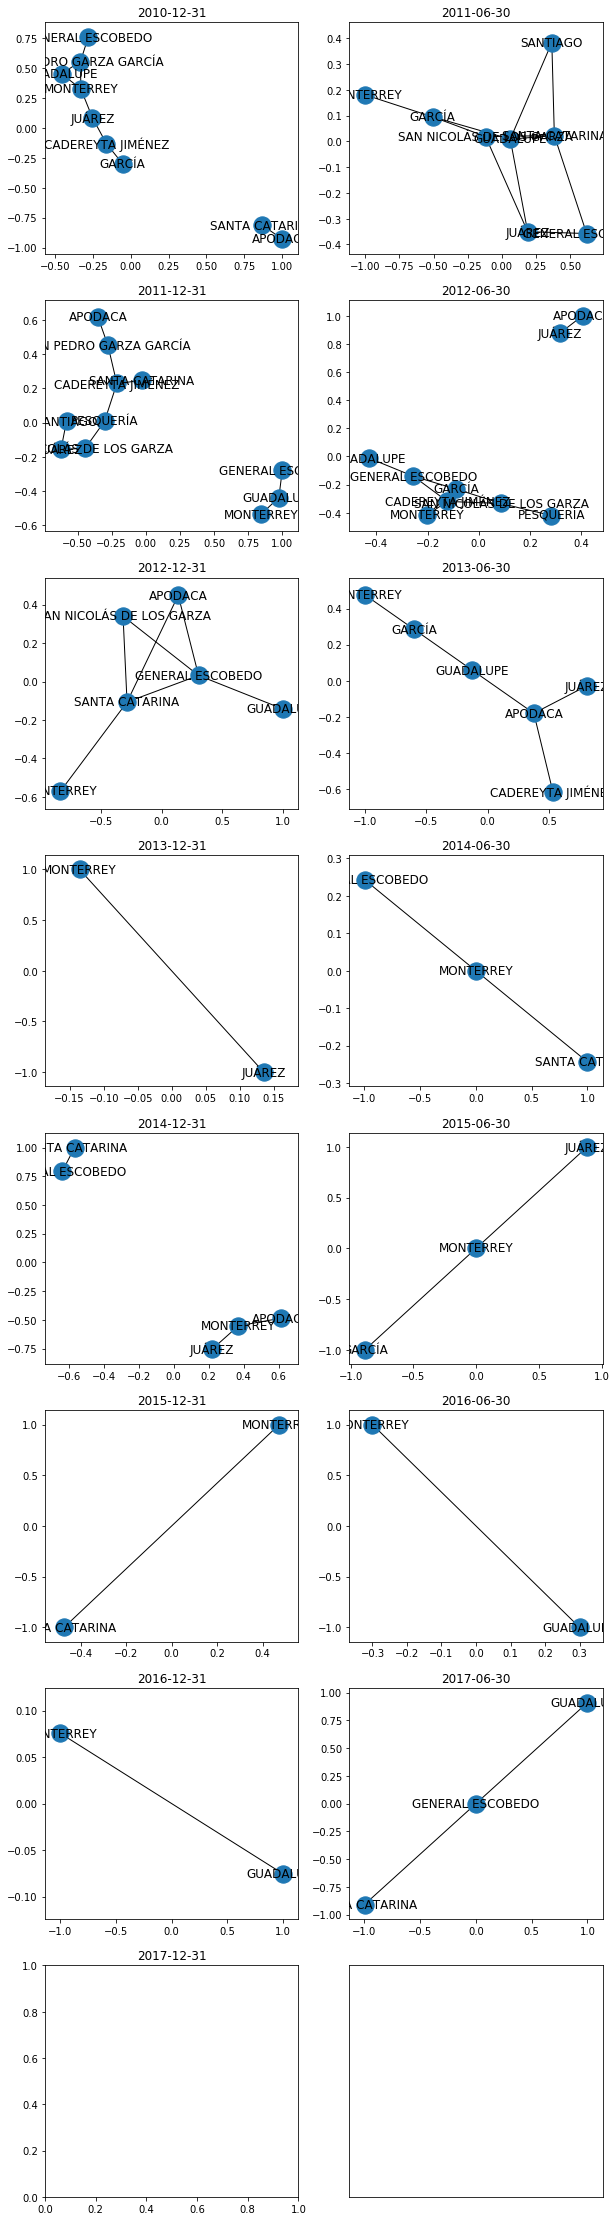

In [52]:
fig, ax = plt.subplots(nrows = int(len(networks)/2+1), ncols= 2, figsize=(10, 40));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(semesters[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

In [54]:
for i in range(len(networks)):
    networks[i].add_nodes_from(municipios)

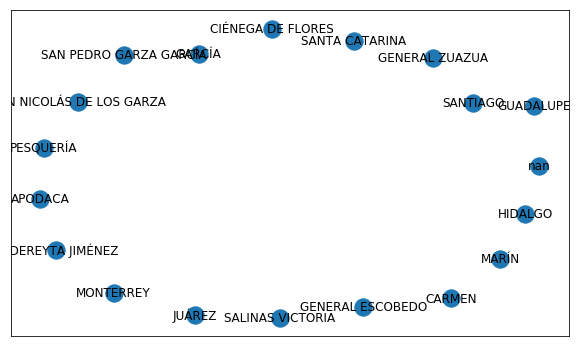

In [56]:
inter = nx.intersection_all(networks)
fig, ax = plt.subplots(1, 1, figsize=(10, 6));
nx.draw_networkx(inter, ax=ax)

### Nada :(

#### Ahora meses

In [72]:
def get_networks(df, time_intervals, folder = None, treshold = None):
    ### function to get networks from the most correlated places
    ### it calls get_correlations_by_time_window to get the correlations
    networks  = []
    for i in range(len(time_intervals)-1):
        corr_pos = get_correlations_by_time_window(df, time_intervals[i], 
                                                   time_intervals[i+1], folder, treshold)
        g = nx.from_pandas_edgelist(corr_pos, edge_attr="correlation")
        networks.append(g)
    corr_pos = get_correlations_by_time_window(df, time_intervals[-1], pd.to_datetime("2018-06-30"), folder)
    g = nx.from_pandas_edgelist(corr_pos, edge_attr="correlation")
    networks.append(g)
    return networks

In [61]:
months = pd.date_range("2010-12-31", max(level_values(1)), freq='M')
networks = get_networks(df_agg, months, "months")

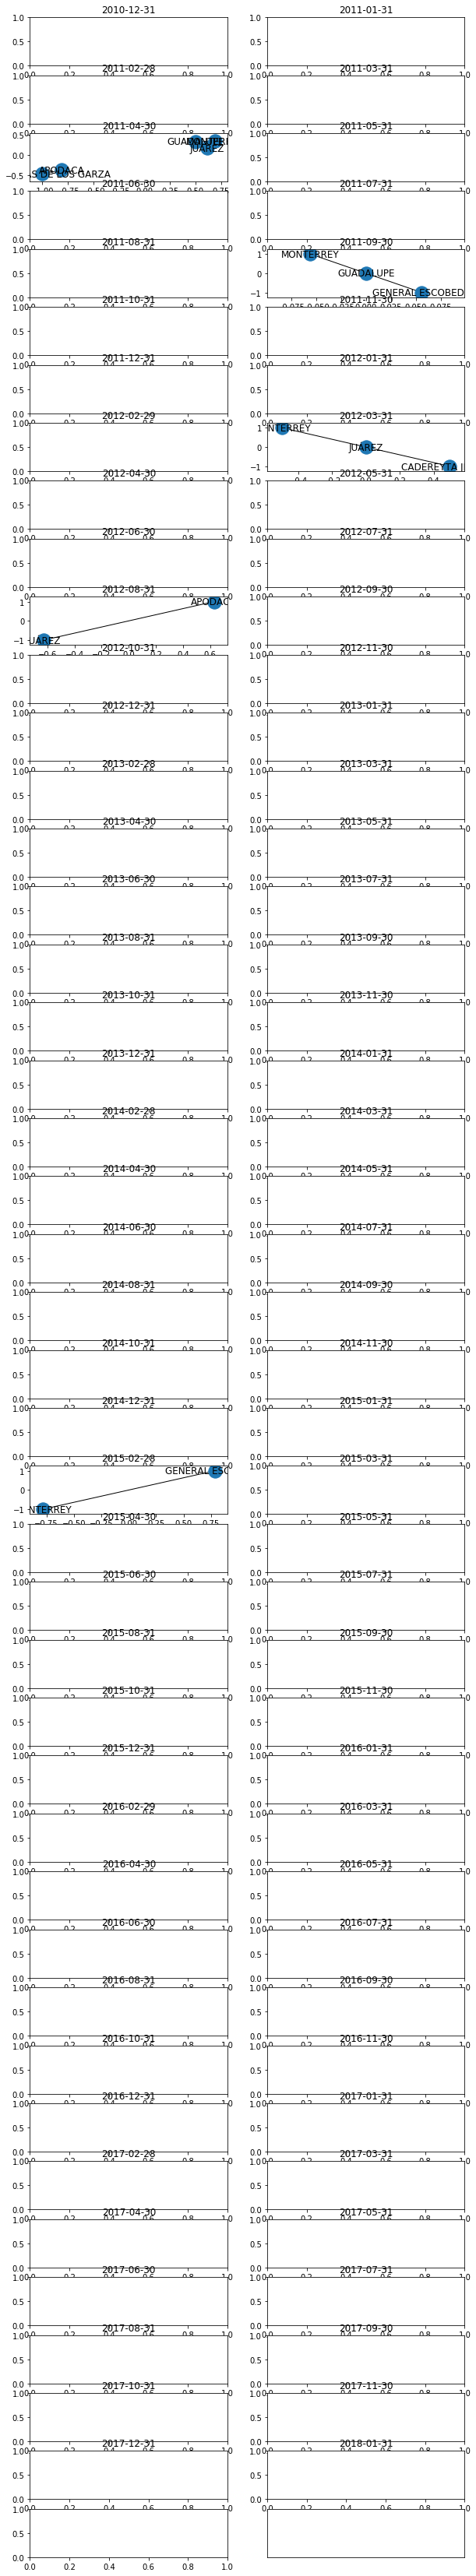

In [62]:
fig, ax = plt.subplots(nrows = int(len(months)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(months[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

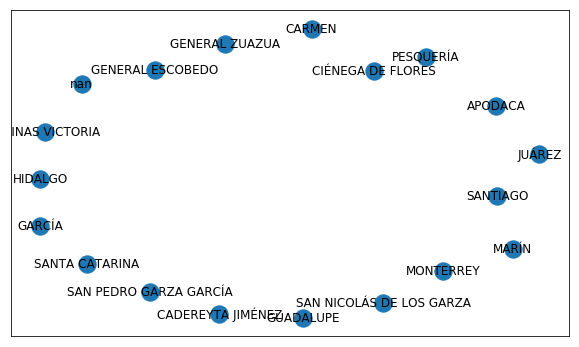

In [64]:
for i in range(len(networks)):
    networks[i].add_nodes_from(municipios)
inter = nx.intersection_all(networks)
fig, ax = plt.subplots(1, 1, figsize=(10, 6));
nx.draw_networkx(inter, ax=ax)

### Nada :(

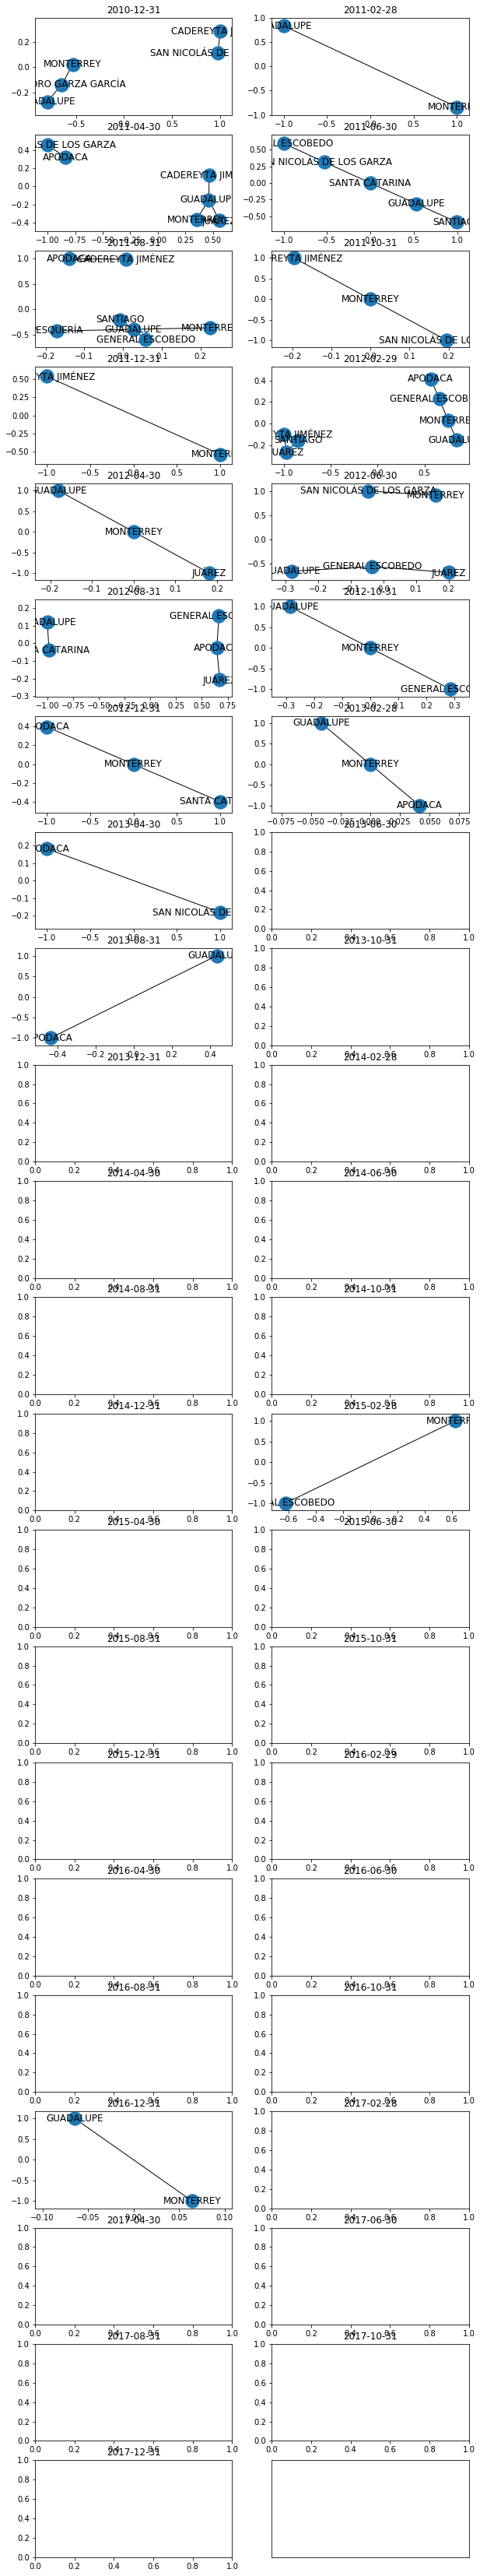

In [66]:
bimonths = pd.date_range("2010-12-31", max(level_values(1)), freq='2M')
networks = get_networks(df_agg, bimonths, "bimonths")
fig, ax = plt.subplots(nrows = int(len(bimonths)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(bimonths[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

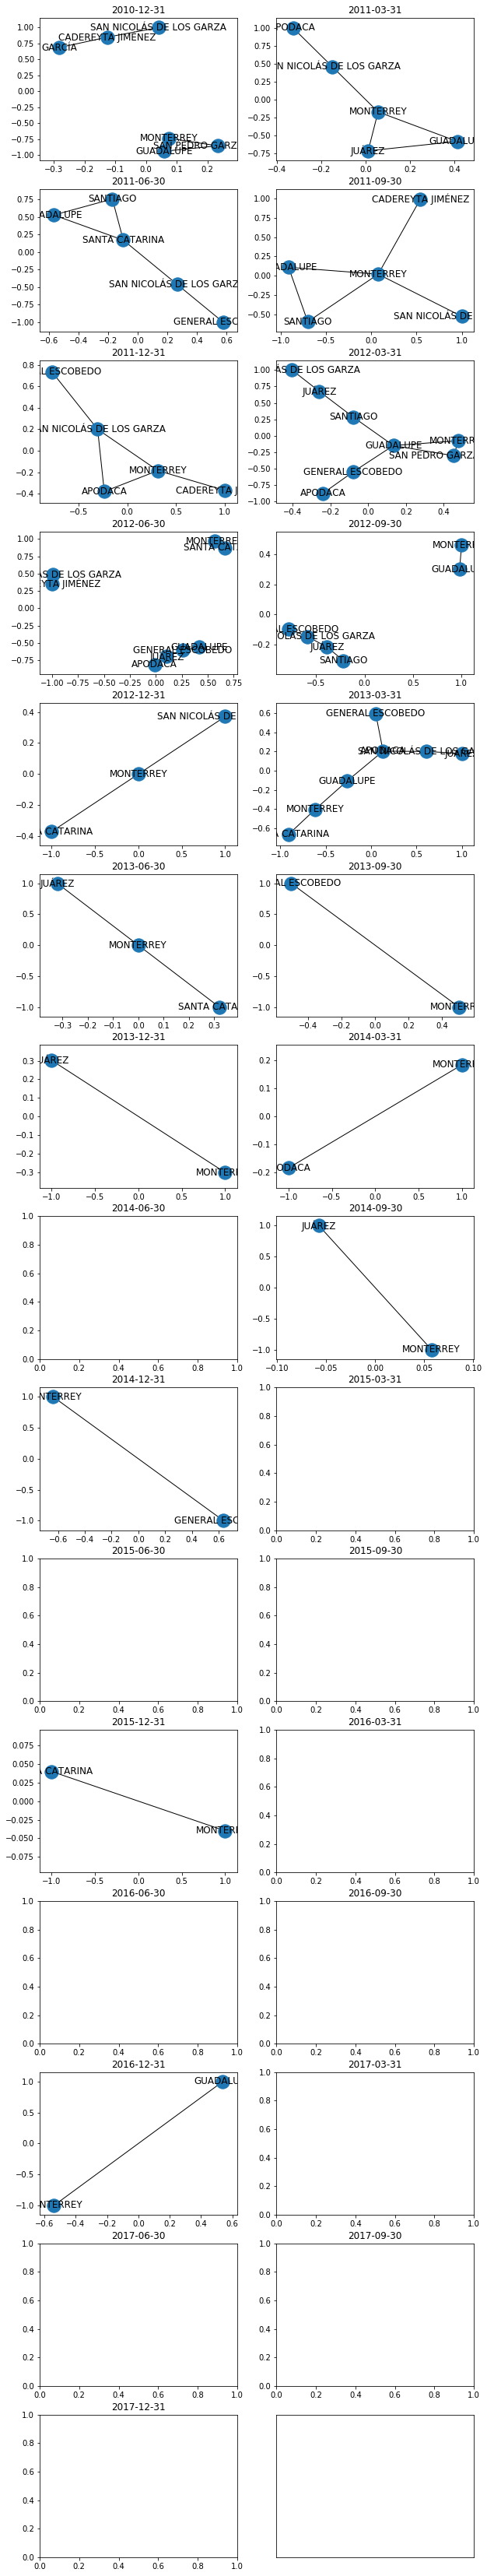

In [71]:
quarters = pd.date_range("2010-12-31", max(level_values(1)), freq='Q')
networks = get_networks(df_agg, quarters, "quarters")
fig, ax = plt.subplots(nrows = int(len(quarters)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(quarters[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

## Pongamos un treshold menos estricto

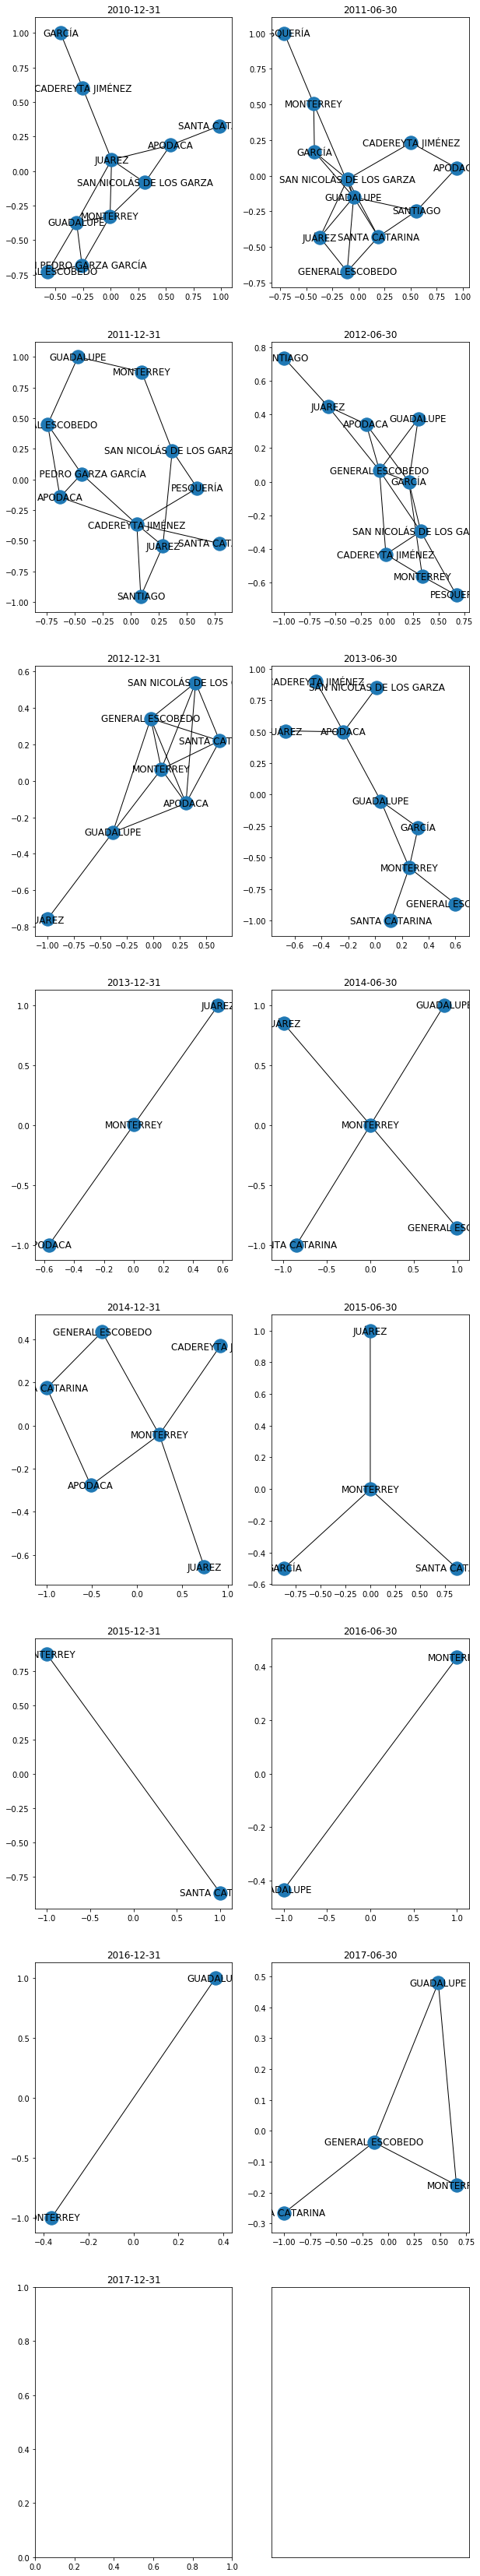

In [76]:
semesters = pd.date_range("2010-12-31", max(level_values(1)), freq='6M')
networks = get_networks(df_agg, semesters, "semesters_1e-1", 0.1)
fig, ax = plt.subplots(nrows = int(len(semesters)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(semesters[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

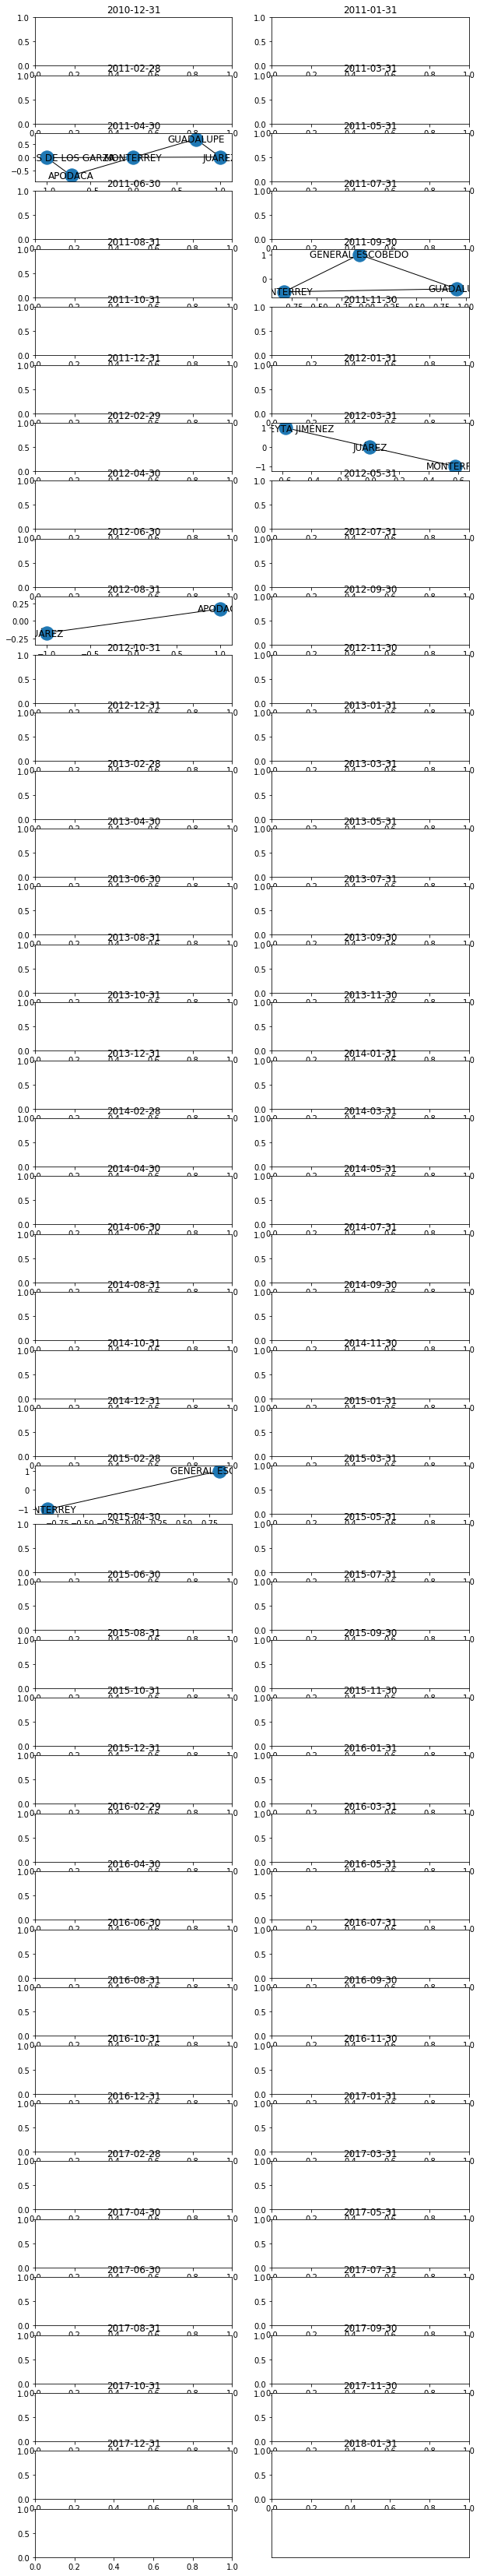

In [78]:
moths = pd.date_range("2010-12-31", max(level_values(1)), freq='M')
networks = get_networks(df_agg, moths, "moths_1e-1", 0.1)
fig, ax = plt.subplots(nrows = int(len(moths)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(moths[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

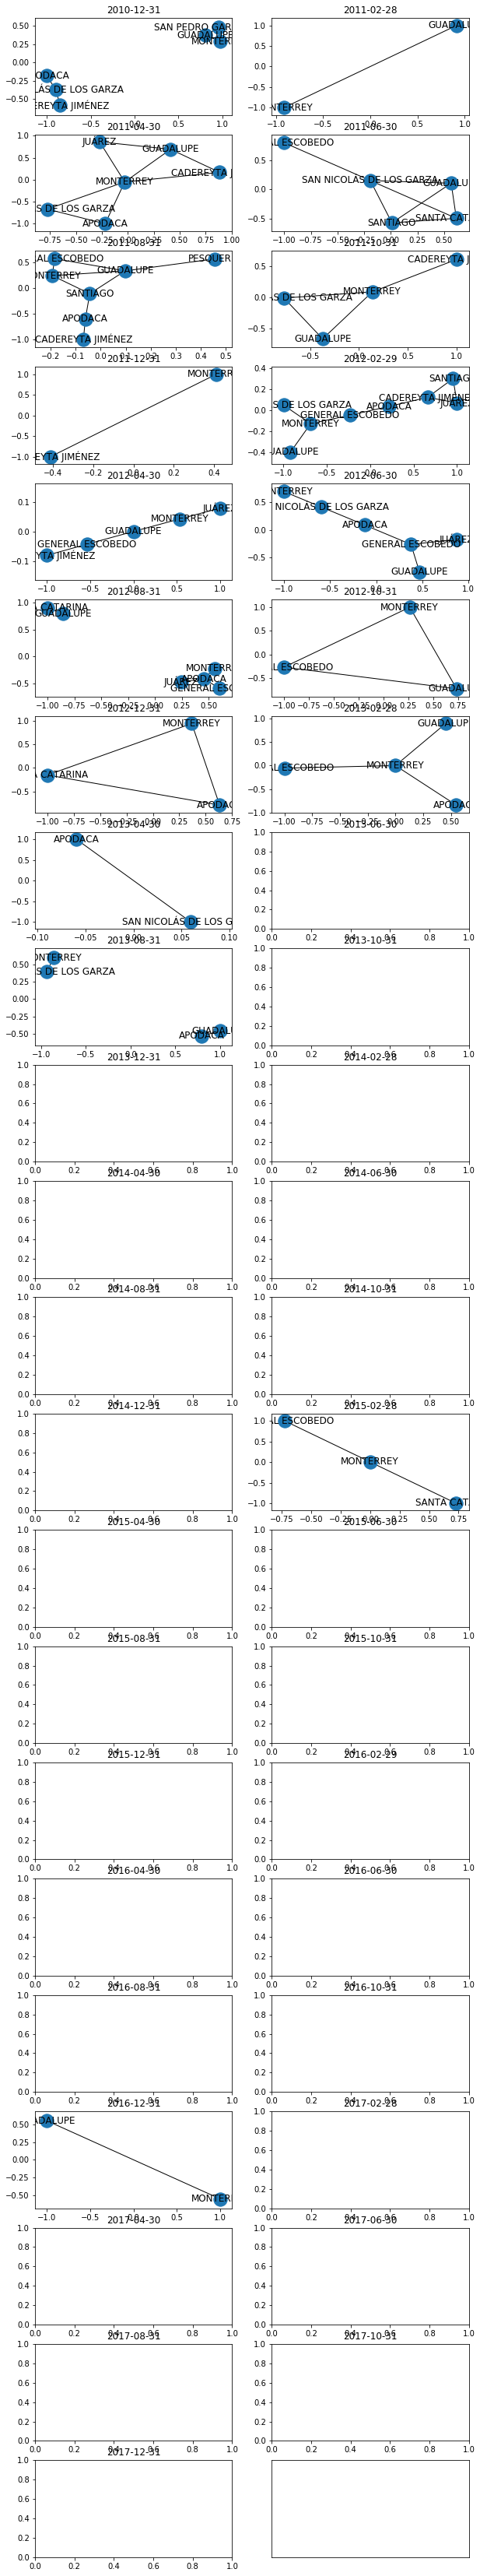

In [79]:
bimonths = pd.date_range("2010-12-31", max(level_values(1)), freq='2M')
networks = get_networks(df_agg, bimonths, "bimonths_1e-1",  0.1)
fig, ax = plt.subplots(nrows = int(len(bimonths)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(bimonths[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()

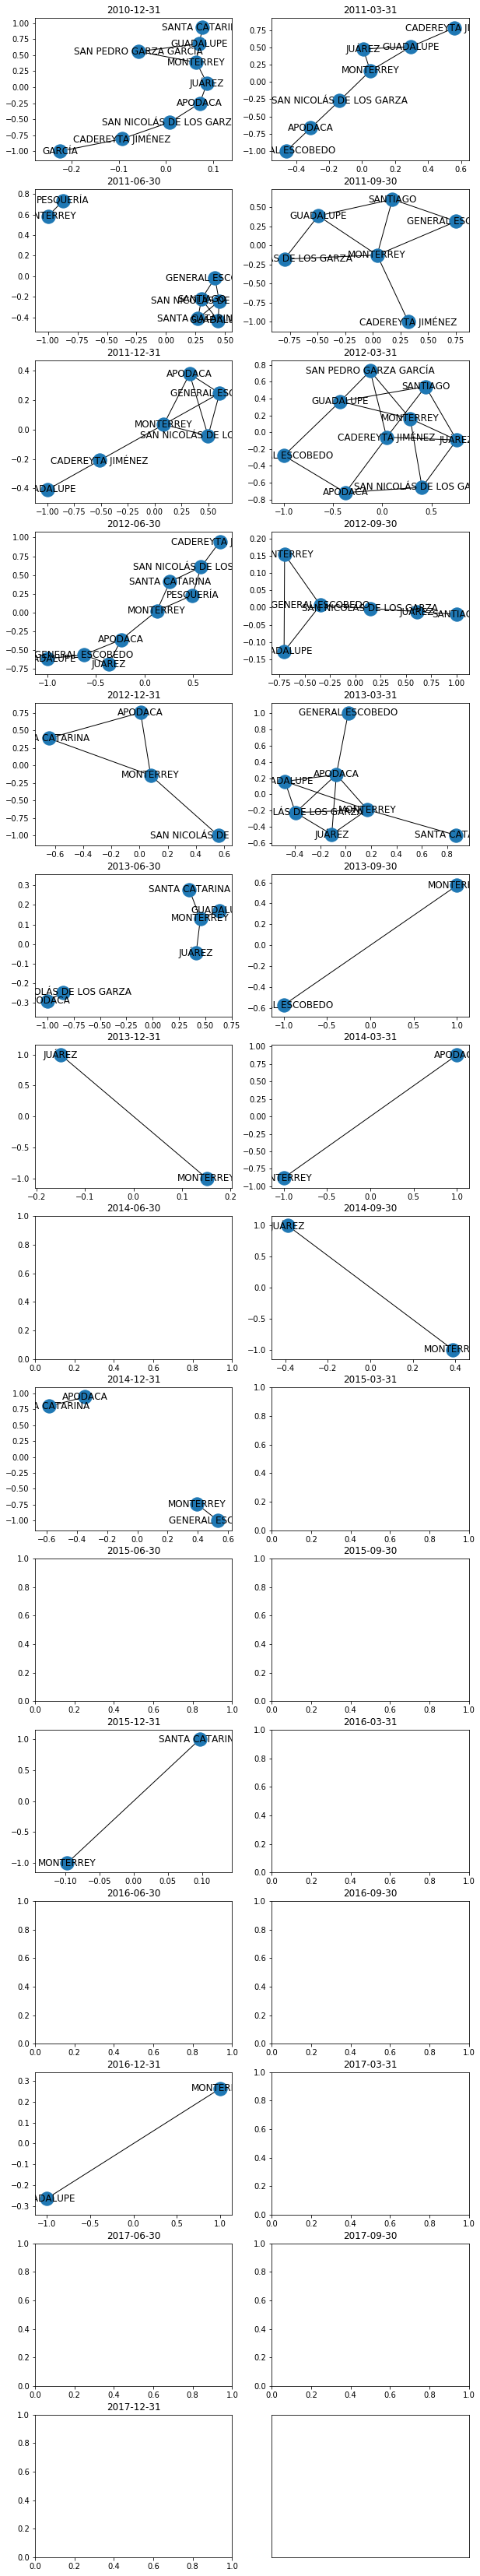

In [80]:
quarters = pd.date_range("2010-12-31", max(level_values(1)), freq='Q')
networks = get_networks(df_agg, quarters, "quarters_1e-1", 0.1)
fig, ax = plt.subplots(nrows = int(len(quarters)/2+1), ncols= 2, figsize=(10, 60));
ax = ax.flatten()
for i in range(len(networks)):
    ax[i].set_title(quarters[i].strftime('%Y-%m-%d'))
    nx.draw_networkx(networks[i], ax=ax[i])
plt.show()